# Predicting heart disease using ML

Steps:
1. Problem definition
2. Data
3. Modelling
4. Experimentation
5. Save the model

## 1. Problem definition

Our problem is to build a predction model to check whether a person has heart disease or not.

## 2. Data
We need datas to train a model.

In [3]:
# Importing necessary libraries
import pandas as pd                  # Pandas used for data manipulation
import numpy as np                   # Numpy for numerical computations
import matplotlib.pyplot as plt      # Matplotlib for data visualization

# Get the data ready
heart_datas = pd.read_csv("./data/heart-disease.csv")    # Reading the csv file of heart disease data to heart_datas
len(heart_datas)                                         # Total raws of datas we have (303 raws of datas)

303

In [4]:
heart_datas.head()      # It display the first five raws of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.1 Visualzations of the data

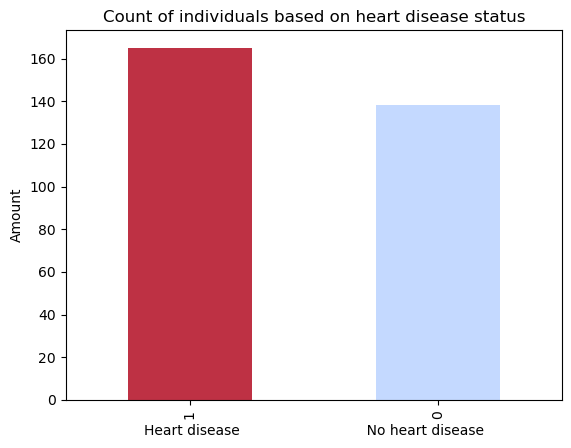

In [5]:
# Lets visualise the target column 

heart_datas["target"].value_counts().plot(kind="bar",color=["#BE3144","#C4D9FF"]);
plt.title("Count of individuals based on heart disease status")
plt.xlabel("Heart disease                             No heart disease")
plt.ylabel("Amount")
plt.show();

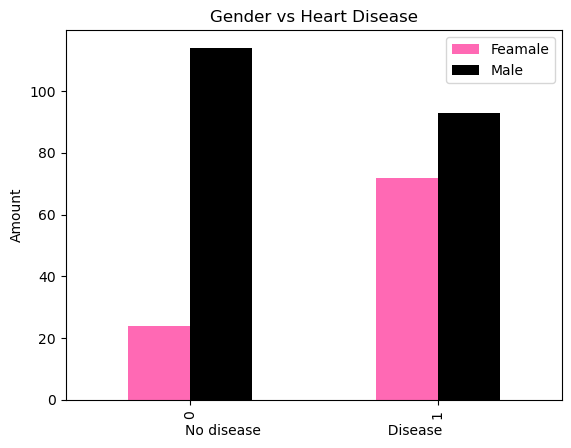

In [6]:
# Visualise Gender vs Heart Disease

pd.crosstab(heart_datas.target,heart_datas.sex).plot(kind="bar",color=["hotpink","black"])
plt.title("Gender vs Heart Disease")
plt.xlabel("No disease                             Disease")
plt.ylabel("Amount")
plt.legend(["Feamale","Male"])
plt.show()

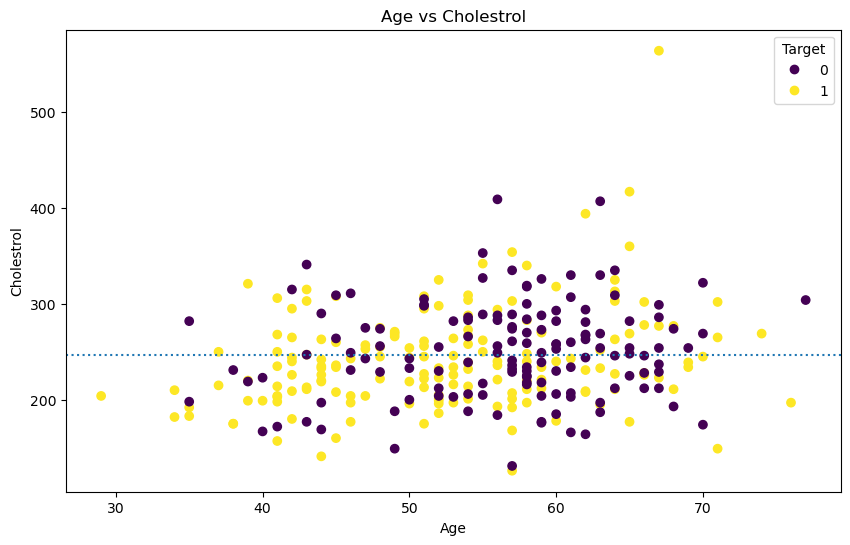

In [7]:
fig,ax=plt.subplots(figsize=(10,6))

scatter=ax.scatter(heart_datas["age"],heart_datas["chol"],c=heart_datas["target"])

ax.set(title="Age vs Cholestrol",xlabel="Age",ylabel="Cholestrol")
ax.legend(*scatter.legend_elements(),title="Target");  
ax.axhline(heart_datas["chol"].mean(),linestyle=":");  # Mean cholestrol level line

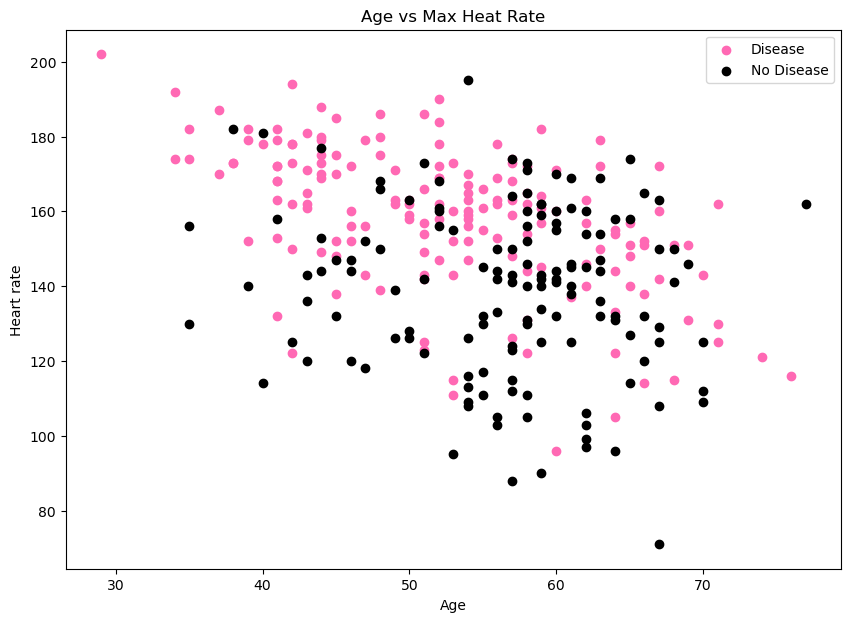

In [8]:
plt.figure(figsize=(10,7))

plt.scatter(heart_datas.age[heart_datas.target==1],heart_datas.thalach[heart_datas.target==1],c=["hotpink"])
plt.scatter(heart_datas.age[heart_datas.target==0],heart_datas.thalach[heart_datas.target==0],c=["black"])

plt.title("Age vs Max Heat Rate")
plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.legend(["Disease","No Disease"])

plt.show();

## 3.Modelling

In [9]:
import warnings 
warnings.filterwarnings("ignore")

In [10]:
# Our data 
heart_datas.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# convert out data into two (x and y) ,features and labels
x = heart_datas.drop("target",axis=1)       # x contains all the datas except target column which is also called features
y = heart_datas["target"]                   # y contains only the target column known as labels

In [12]:
np.random.seed(42)  # setting a static seed value

# Divide the datas for model training and testing
from sklearn.model_selection import train_test_split     # Used to split train and test datas
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)   # Here 80% of the total rows of our data will be trained and 20 % of datas are used to test our model

In [13]:
# Importing some classification algorithms to train our model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Dictionary of different classifier
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

# create a function to find the best classification model for our problem
def fit_and_score(models,x_train,x_test,y_train,y_test):

    np.random.seed(42)

    model_scores={}

    for name,model in models.items():   # Looping throught the items of the models dictinory
        #fit the model to the data
        model.fit(x_train,y_train)
        model_scores[name]=(model.score(x_test,y_test))

    return model_scores
    
    for name,model in models.items():   # Looping throught the items of the models dictinory
        #fit the model to the data
        model.fit(x_train,y_train)
        model_scores[name]=(model.score(x_test,y_test))

    return model_scores

In [14]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

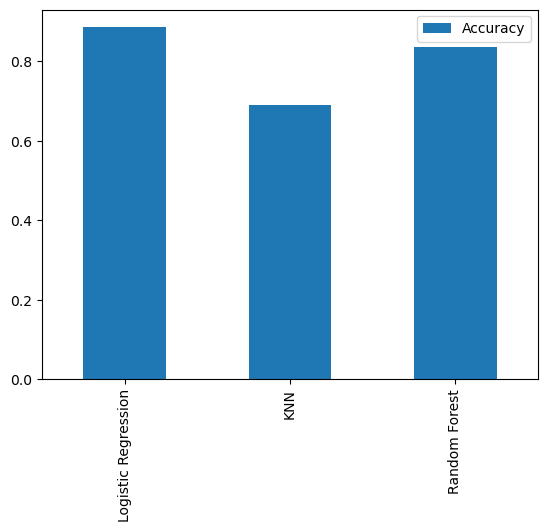

In [15]:
# Visualise the accuracy of each classifier
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar()
plt.show()

In [16]:
# The Logistics Regression provides score of 0.88 so we chose that model to bulid our model
# Now lets tune our LogisticRegression to improve its score

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV   # Used to tune (improve) a model

log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}          # Hyperparameters of LogisticRegression



np.random.seed(42)

# 1. By using RandomizedSearchCV
rs_log_reg =RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True
                              )

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [17]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [18]:
# 2. By using GridSearchCV

log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

gs_log_reg =GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                              
                               verbose=True
                              )
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [19]:
gs_log_reg.best_estimator_ # Gives the best parmeters for the model 

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [20]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [21]:
model=LogisticRegression(C=0.20433597178569418, solver='liblinear')  # Giving the best hyperprameters to the model
model.fit(x_train,y_train)     # Fit the train datas to learn patters from the data 

LogisticRegression(C=0.20433597178569418, solver='liblinear')

## 4.Experimentation

In [22]:
# Create a function to evaluate the models predictions

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def evaluate_model(predicted,actual):
    accuracy=accuracy_score(predicted,actual)
    precision=precision_score(predicted,actual)
    recall=recall_score(predicted,actual)
    f1=f1_score(predicted,actual)

    print(f"Accuracy : {accuracy*100:.2f}%")
    print(f"Precision : {precision}")
    print(f"Recall : {recall}")
    print(f"F1 : {f1}")
    

In [23]:
prediction=model.predict(x_test)   # Make predictions using the test data 

In [24]:
evaluate_model(prediction,y_test)  # Evaluating the prediction of the model with the actual label 

Accuracy : 88.52%
Precision : 0.90625
Recall : 0.8787878787878788
F1 : 0.8923076923076924


## 5. Save the model

In [25]:
# Save the heart disease detection model into a file 
import pickle
pickle.dump(model,open("Heart_Disease_Detection_Model.pkl", "wb"))

In [26]:
# Load a saved model
load_pkl_model=pickle.load(open("Heart_Disease_Detection_Model.pkl", "rb"))
model_pred = load_pkl_model.predict(x_test)
mod_pred_acc = evaluate_model(y_test,model_pred)

Accuracy : 88.52%
Precision : 0.8787878787878788
Recall : 0.90625
F1 : 0.8923076923076924
